# OpenAI Assistants API

OpenAI's [Assistants API](https://platform.openai.com/docs/assistants/overview), which is currently in beta, lets you build AI assistants for your own applications. An assistant can leverage Large Language Models (LLMs), tools, and documents to respond to user queries. The Assistants API currently supports three types of tools: [`Code Interpreter`](https://platform.openai.com/docs/assistants/tools/code-interpreter), [`File Search`](https://platform.openai.com/docs/assistants/tools/file-search), and [`Function Calling`](https://platform.openai.com/docs/assistants/tools/function-calling). It  also supports message threads, which retain the context of conversations. To get started, let's create an assistant and learn about various ways to handle input and output.

In [1]:
from openai import OpenAI

# Create an OpenAI client
client = OpenAI(api_key='OPENAI_API_KEY')

# Create an assistant
assistant = client.beta.assistants.create(
    name='Expert Assistant',
    instructions='You are a friendly assistant who can answer questions from users.',
    model='gpt-4o'
)

 Ask the assistant a question and wait for a response.

In [2]:
# Create a message thread
thread = client.beta.threads.create()

# Add a message to the message thread
client.beta.threads.messages.create(
    thread_id=thread.id,
    role='user',
    content='Why is the sky blue?'
)

# Create a run and wait until it completes
run = client.beta.threads.runs.create_and_poll(
    thread_id=thread.id,
    assistant_id=assistant.id,
)

# Show the response
if run.status == 'completed': # Run was successful
    messages = client.beta.threads.messages.list(thread_id=thread.id)
    response = messages.data[0].content[0].text.value
    print(response)
else: # run.status is expired, failed, incomplete, or cancelled
    print(run.status)

The sky appears blue mainly due to a phenomenon called Rayleigh scattering. Here's a simple explanation:

1. **Sunlight Composition**: Sunlight, or white light, is made up of a spectrum of colors, each of which has a different wavelength. These colors range from violet and blue with shorter wavelengths to red and orange with longer wavelengths.

2. **Interaction with Atmosphere**: As sunlight enters the Earth's atmosphere, it collides with molecules of gases and small particles in the air. 

3. **Scattering of Light**: Blue light has a shorter wavelength compared to other colors. Shorter wavelengths scatter more easily when they interact with the molecules in the atmosphere. This scattering happens in all directions.

4. **Dominance of Blue Light**: Although violet light scatters even more than blue light, our eyes are more sensitive to blue light and some violet light is absorbed by the upper atmosphere.

As a result, when you look up at the sky during the day, the scattered blue ligh

Do it again, but this time stream the response.

In [3]:
# Add a message to the message thread
client.beta.threads.messages.create(
    thread_id=thread.id,
    role='user',
    content='Why is the sky blue?'
)

# Create a streaming run
stream = client.beta.threads.runs.create(
    thread_id=thread.id,
    assistant_id=assistant.id,
    stream=True
)

# Stream the output
for event in stream:
    if event.event == 'thread.message.delta':
        text = event.data.delta.content[0].text.value
        print(text, end='', flush=True)

The sky appears blue primarily due to a phenomenon known as Rayleigh scattering. Here's a straightforward breakdown:

1. **Sunlight and Its Composition**: Sunlight, or white light, is composed of many different colors, each corresponding to a different wavelength. These colors range from violet and blue (shorter wavelengths) to red and orange (longer wavelengths).

2. **Atmospheric Interaction**: When sunlight enters the Earth's atmosphere, it interacts with molecules and small particles in the air.

3. **Scattering of Light**: The shorter wavelengths of light (blue and violet) scatter more efficiently in all directions than the longer wavelengths (like red and yellow) when they strike gas molecules and other small particles in the atmosphere.

4. **Human Eye Sensitivity and Absorption**: Even though violet light is scattered even more than blue, our eyes are less sensitive to violet light, and some of it is absorbed by the upper atmosphere. Thus, blue is the predominant color that we 

During a streaming run, events are received from a Server-Sent Event (SSE) connection to the server. Here's a run that shows all the events sent down from the server.

In [4]:
client.beta.threads.messages.create(
    thread_id=thread.id,
    role='user',
    content='Why is the sky blue?'
)

stream = client.beta.threads.runs.create(
    thread_id=thread.id,
    assistant_id=assistant.id,
    stream=True
)

for event in stream:
    print(event.event)

thread.run.created
thread.run.queued
thread.run.in_progress
thread.run.step.created
thread.run.step.in_progress
thread.message.created
thread.message.in_progress
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delta
thread.message.delt

Rather than iterate over all events looking for those that include text deltas, you can do this:

In [5]:
client.beta.threads.messages.create(
    thread_id=thread.id,
    role='user',
    content='Why is the sky blue?'
)

with client.beta.threads.runs.stream(
    thread_id=thread.id,
    assistant_id=assistant.id
) as stream:
    for text in stream.text_deltas:
        print(text, end='', flush=True)

The sky appears blue because of Rayleigh scattering. Here's a concise explanation:

1. **Composition of Sunlight**: Sunlight is made up of multiple colors, corresponding to different wavelengths. These colors range from violet and blue (shorter wavelengths) to red and orange (longer wavelengths).

2. **Atmospheric Interaction**: As sunlight enters the Earth's atmosphere, it encounters air molecules and small particles.

3. **Scattering Principle**: Shorter wavelengths (blue and violet) are scattered in all directions by the molecules in the atmosphere much more than longer wavelengths (red and yellow).

4. **Human Eye Sensitivity and Absorption**: Although violet light is scattered even more than blue, the human eye is less sensitive to violet, and some of it is absorbed by the upper atmosphere. This makes blue light the most dominant color that we see.

As a result, when you look up at the sky during the day, the predominance of scattered blue light is what makes the sky appear blue t

Another option is to define a child class of OpenAI's `AssistantEventHandler` class, override the `on_text_delta` function, and pass an instance of that class to the `stream` function.

In [6]:
from typing_extensions import override
from openai import AssistantEventHandler

class EventHandler(AssistantEventHandler):
    @override
    def on_text_delta(self, delta, snapshot):
        print(delta.value, end='', flush=True)

client.beta.threads.messages.create(
    thread_id=thread.id,
    role='user',
    content='Why is the sky blue?'
)

with client.beta.threads.runs.stream(
    thread_id=thread.id,
    assistant_id=assistant.id,
    event_handler=EventHandler()
) as stream:
    stream.until_done()

The sky is blue due to a process called Rayleigh scattering. Here’s a succinct explanation:

1. **Composition of Sunlight**: Sunlight, or white light, is composed of a spectrum of colors, each with different wavelengths. These colors range from violet and blue (shorter wavelengths) to red and orange (longer wavelengths).

2. **Atmospheric Interaction**: As sunlight enters the Earth’s atmosphere, it encounters gas molecules and small particles.

3. **Scattering of Light**: Shorter wavelengths of light (blue and violet) are scattered in all directions by the gas molecules in the atmosphere more than longer wavelengths (like red and yellow).

4. **Human Eye Sensitivity and Absorption**: Although violet light is scattered more than blue light, our eyes are less sensitive to violet light and some of it is absorbed by the upper atmosphere. This makes blue light the most prominent color that we see.

Therefore, the extensive scattering of blue light in all directions causes the sky to appear 

Clean up by deleting the assistant.

In [7]:
client.beta.assistants.delete(assistant.id)

AssistantDeleted(id='asst_DhEP8GEbqDKbQTNnr01NnzFp', deleted=True, object='assistant.deleted')

## File Search tool (RAG made easy)

The `File Search` tool makes it easy to answer questions from curated sets of documents using [Retrieval Augmented Generation](https://arxiv.org/abs/2312.10997), or RAG. Let's demonstrate by building an assistant that can answer questions about electric vehicles (EVs) using three government PDFs as its knowledge base. Begin by creating a vector store and uploading the PDFs.

In [8]:
vector_store = client.beta.vector_stores.create(name='Electric Vehicles')

file_paths = [
    'Data/electric_vehicles.pdf',
    'Data/pev_consumer_handbook.pdf',
    'Data/department-for-transport-ev-guide.pdf'
]

files = [open(path, 'rb') for path in file_paths]

client.beta.vector_stores.file_batches.upload_and_poll(
    vector_store_id=vector_store.id,
    files=files
)

VectorStoreFileBatch(id='vsfb_6701b986c9dc4fd785157547b530d3d4', created_at=1721930490, file_counts=FileCounts(cancelled=0, completed=3, failed=0, in_progress=0, total=3), object='vector_store.file_batch', status='completed', vector_store_id='vs_hkCIz2QKaR7YMetYk34WQlq2')

Create an assistant that uses the `File Search` tool and point it to the vector store.

In [9]:
assistant = client.beta.assistants.create(
    name='File Search Assistant',
    instructions='''You are a transportation expert who can answer questions about electric vehicles
        using a vector store. If a question can't be answered using the vector store, say "I'm sorry,
        but I don't know.
        ''',
    model='gpt-4o',
    tools=[{ 'type': 'file_search' }],
    tool_resources={ "file_search": { "vector_store_ids": [vector_store.id] }}
)

Ask the assistant a question about electric vehicles and stream the response.

In [10]:
thread = client.beta.threads.create()

message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role='user',
    content='How far can an EV travel on a single charge?'
)

with client.beta.threads.runs.stream(
    thread_id=thread.id,
    assistant_id=assistant.id
) as stream:
    for text in stream.text_deltas:
        print(text, end='', flush=True)

The distance that an electric vehicle (EV) can travel on a single charge varies significantly depending on factors such as the model, driving conditions, and battery size. Generally, modern electric vehicles have a range between 100 and 400+ miles on a fully charged battery:

- Typical EVs are designed to travel about 100 to 400 miles per charge【4:1†source】【4:3†source】.
- For instance, the Renault Zoe with a 52kWh battery can travel approximately 242 miles on a full charge【4:5†source】.
- According to the Federal Highway Administration, most EVs' range is sufficient for more than 90% of all household vehicle trips in the United States【4:0†source】.

The range of an EV may be influenced by several factors including driving habits, weather conditions, and use of additional electrical features like climate control systems【4:1†source】【4:2†source】【4:11†source】.

Make sure the assistant will admit that it doesn't know the answer to a question that doesn't involve electric vehicles.

In [11]:
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role='user',
    content='Why is the sky blue?'
)

with client.beta.threads.runs.stream(
    thread_id=thread.id,
    assistant_id=assistant.id
) as stream:
    for text in stream.text_deltas:
        print(text, end='', flush=True)

I'm sorry, but I don't know.

Clean up by deleting the assistant, the files, and the vector store.

In [12]:
for file in client.beta.vector_stores.files.list(vector_store.id):
    client.files.delete(file.id)

client.beta.vector_stores.delete(vector_store.id)
client.beta.assistants.delete(assistant.id)

AssistantDeleted(id='asst_EkNs173LI4hbMn0W3MH4eb7V', deleted=True, object='assistant.deleted')

## Function Calling tool

The `Function Calling` tool lets you extend an LLM's capabilities by providing functions that it can call to execute tasks that it isn't capable of executing on its own. To demonstrate, let's give an LLM the ability to retrieve weather information. Start by asking `GPT-4o` to describe the current weather in London.

In [13]:
messages = [{ 'role': 'user', 'content': "What's the current weather in London?" }]

chunks = client.chat.completions.create(
    model='gpt-4o',
    messages=messages,
    stream=True
)

for chunk in chunks:
    content = chunk.choices[0].delta.content
    if content is not None:
        print(content, end='')

I don't have real-time access to data. However, you can easily find the current weather in London by checking a reliable weather website, using a weather app on your mobile device, or just asking a smart assistant equipped with real-time capabilities.

Define a function that accepts the name of a location as input and retrieves information about the current weather at that location using the [OpenWeather](https://openweathermap.org/api) API. You will need to substitute your own API key for `OPENWEATHER_API_KEY`. API keys are free, and you get 1,000 calls per day for free, too.

In [14]:
import json, requests

def get_current_weather(location):
    url = f'https://api.openweathermap.org/data/2.5/weather?q={location}&appid=OPENWEATHER_API_KEY&units=imperial'
    
    try:
        response = requests.get(url)
        return json.dumps(response.json())

    except requests.RequestException as e:
        return f"I'm sorry, but something went wrong ({type(e)})."

Describe the function and its parameters to the Assistants API.

In [15]:
tools = [
    {
        'type': 'function',
        'function': {
            'name': 'get_current_weather',
            'description': """
                Retrieves the current weather at the specified location.
                Also returns the location's latitude and longitude and the country it's in.
                """,
            'parameters': {
                'type': 'object',
                'properties': {
                    'location': {
                        'type': 'string',
                        'description': 'The location whose weather is to be retrieved.'
                    }
                },
                'required': ['location']
            }
        }
    }
]

Create an assistant that's aware of the function.

In [16]:
assistant = client.beta.assistants.create(
    name='Function Calling Assistant',
    instructions='You are a helpful assistant who can provide information about current weather conditions.',
    model='gpt-4o',
    tools=tools
)

Define an event handler that responds to events indicating that one or more functions need to be called.

In [17]:
class EventHandler(AssistantEventHandler):
    @override
    def on_event(self, event):
        if event.event == 'thread.run.requires_action':
            tool_outputs = []

            # Call function(s) identified by the Assistants API
            for tool_call in event.data.required_action.submit_tool_outputs.tool_calls:
                function_name = tool_call.function.name
    
                if function_name == 'get_current_weather':
                    location = json.loads(tool_call.function.arguments)['location']
                    output = get_current_weather(location)
                else:
                    raise Exception('Invalid function name')
    
                tool_output = {
                    'tool_call_id': tool_call.id,
                    'output': output
                }

                tool_outputs.append(tool_output)

            # Pass the output to the Assistants API and stream the response
            with client.beta.threads.runs.submit_tool_outputs_stream(
                thread_id=self.current_run.thread_id,
                run_id=self.current_run.id,
                tool_outputs=tool_outputs
            ) as stream:
                for text in stream.text_deltas:
                    print(text, end='', flush=True)

Ask the assistant about the current weather in London.

In [18]:
thread = client.beta.threads.create()

message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role='user',
    content="What's the current weather in London?"
)

with client.beta.threads.runs.stream(
    thread_id=thread.id,
    assistant_id=assistant.id,
    event_handler=EventHandler()
) as stream:
    for text in stream.text_deltas:
        print(text, end='', flush=True)

Currently, in London, the weather is overcast with 100% cloud cover. Here are some detailed weather conditions:

- **Temperature**: 65.91°F (feels like 66.29°F)
- **Humidity**: 87%
- **Pressure**: 1009 hPa
- **Visibility**: 10,000 meters
- **Wind**: Speed of 12.66 mph, coming from the southwest (220°)

Sunrise was at 05:14 AM, and sunset will be at 08:06 PM.

Rather than print chunks of text separately from the two streams, you can add an `on_text_delta` event handler to the `EventHandler` class and provide an instance of that class to the `stream` function and the `submit_tool_outputs_stream` function:

In [19]:
class EventHandler(AssistantEventHandler):
    @override
    def on_text_delta(self, delta, snapshot):
        print(delta.value, end='', flush=True)
        
    @override
    def on_event(self, event):
        if event.event == 'thread.run.requires_action':
            tool_outputs = []

            # Call function(s) identified by the Assistants API
            for tool_call in event.data.required_action.submit_tool_outputs.tool_calls:
                function_name = tool_call.function.name
    
                if function_name == 'get_current_weather':
                    location = json.loads(tool_call.function.arguments)['location']
                    output = get_current_weather(location)
                else:
                    raise Exception('Invalid function name')
    
                tool_output = {
                    'tool_call_id': tool_call.id,
                    'output': output
                }

                tool_outputs.append(tool_output)

            # Pass the output to the Assistants API and stream the response
            with client.beta.threads.runs.submit_tool_outputs_stream(
                thread_id=self.current_run.thread_id,
                run_id=self.current_run.id,
                tool_outputs=tool_outputs,
                event_handler=EventHandler()
            ) as stream:
                stream.until_done()

message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role='user',
    content='Is it raining in Paris?'
)

with client.beta.threads.runs.stream(
    thread_id=thread.id,
    assistant_id=assistant.id,
    event_handler=EventHandler()
) as stream:
    stream.until_done()

No, it is not raining in Paris currently. The weather is clear with no cloud cover.

Here are some additional weather details:

- **Temperature**: 81.52°F (feels like 81.16°F)
- **Humidity**: 41%
- **Pressure**: 1012 hPa
- **Visibility**: 10,000 meters
- **Wind**: Speed of 10.36 mph, coming from the southwest (230°)

The skies are clear with a "clear sky" description.

Delete the assistant.

In [20]:
client.beta.assistants.delete(assistant.id)

AssistantDeleted(id='asst_PY25T3WRdnH5mB2zXZSWNq7H', deleted=True, object='assistant.deleted')

## Code Interpreter tool

The `Code Interpreter` tool responds to input by generating Python code and executing it in a sandbox. The next example creates an assistant that uses `Code Interpreter` to measure the distance that an airplane traveled by computing the distance between two latitudes and longitudes. Under the hood, the assistant generates code that uses the [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula) to compute distances.

In [21]:
prompt = '''
    An airplane flies from one location at latitude 36.010357, longitude -84.269646
    (Oak Ridge, TN) to another location at latitude 37.681873, longitude -121.768005
    (Livermore, CA). How many miles did the airplane travel?
    '''

assistant = client.beta.assistants.create(
    name='Code Interpreter  Assistant',
    instructions='You are a helpful assistant who can provide information about distances traveled.',
    model='gpt-4o',
    tools=[{ 'type': 'code_interpreter' }]
)

message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role='user',
    content=prompt
)

with client.beta.threads.runs.stream(
    thread_id=thread.id,
    assistant_id=assistant.id
) as stream:
    for text in stream.text_deltas:
        print(text, end='', flush=True)

The airplane traveled approximately 2061.3 miles from Oak Ridge, TN to Livermore, CA.

Delete the assistant before creating another.

In [22]:
client.beta.assistants.delete(assistant.id)

AssistantDeleted(id='asst_Ij75CrnSXz0AwhISWeBH5t4M', deleted=True, object='assistant.deleted')

Another use for the `Code Interpreter` tool is generating charts and graphs from data you provide. To demonstrate, let's create an assistant that knows about the tool.

In [23]:
assistant = client.beta.assistants.create(
    name='Code Interpreter Assistant',
    instructions='You are a helpful assistant who can generate informative charts and graphs.',
    model='gpt-4o',
    tools=[{ 'type': 'code_interpreter' }]
)

Define an event handler that responds to `on_text_delta` and `on_image_file_done` events. Also store the file IDs of images that the assistant generates so those files can be cleaned up later.

In [24]:
from IPython.display import display, Image

file_ids = []

class EventHandler(AssistantEventHandler):
    @override
    def on_text_delta(self, delta, snapshot):
        print(delta.value, end='', flush=True)

    @override
    def on_image_file_done(self, image_file):
        file_id = image_file.file_id
        file_ids.append(file_id)
        image_file = client.files.content(file_id)
        image_bytes = image_file.read()
        display(Image(image_bytes))

Ask the assistant to generate a chart from a list of airports and the average delay at each aiport.

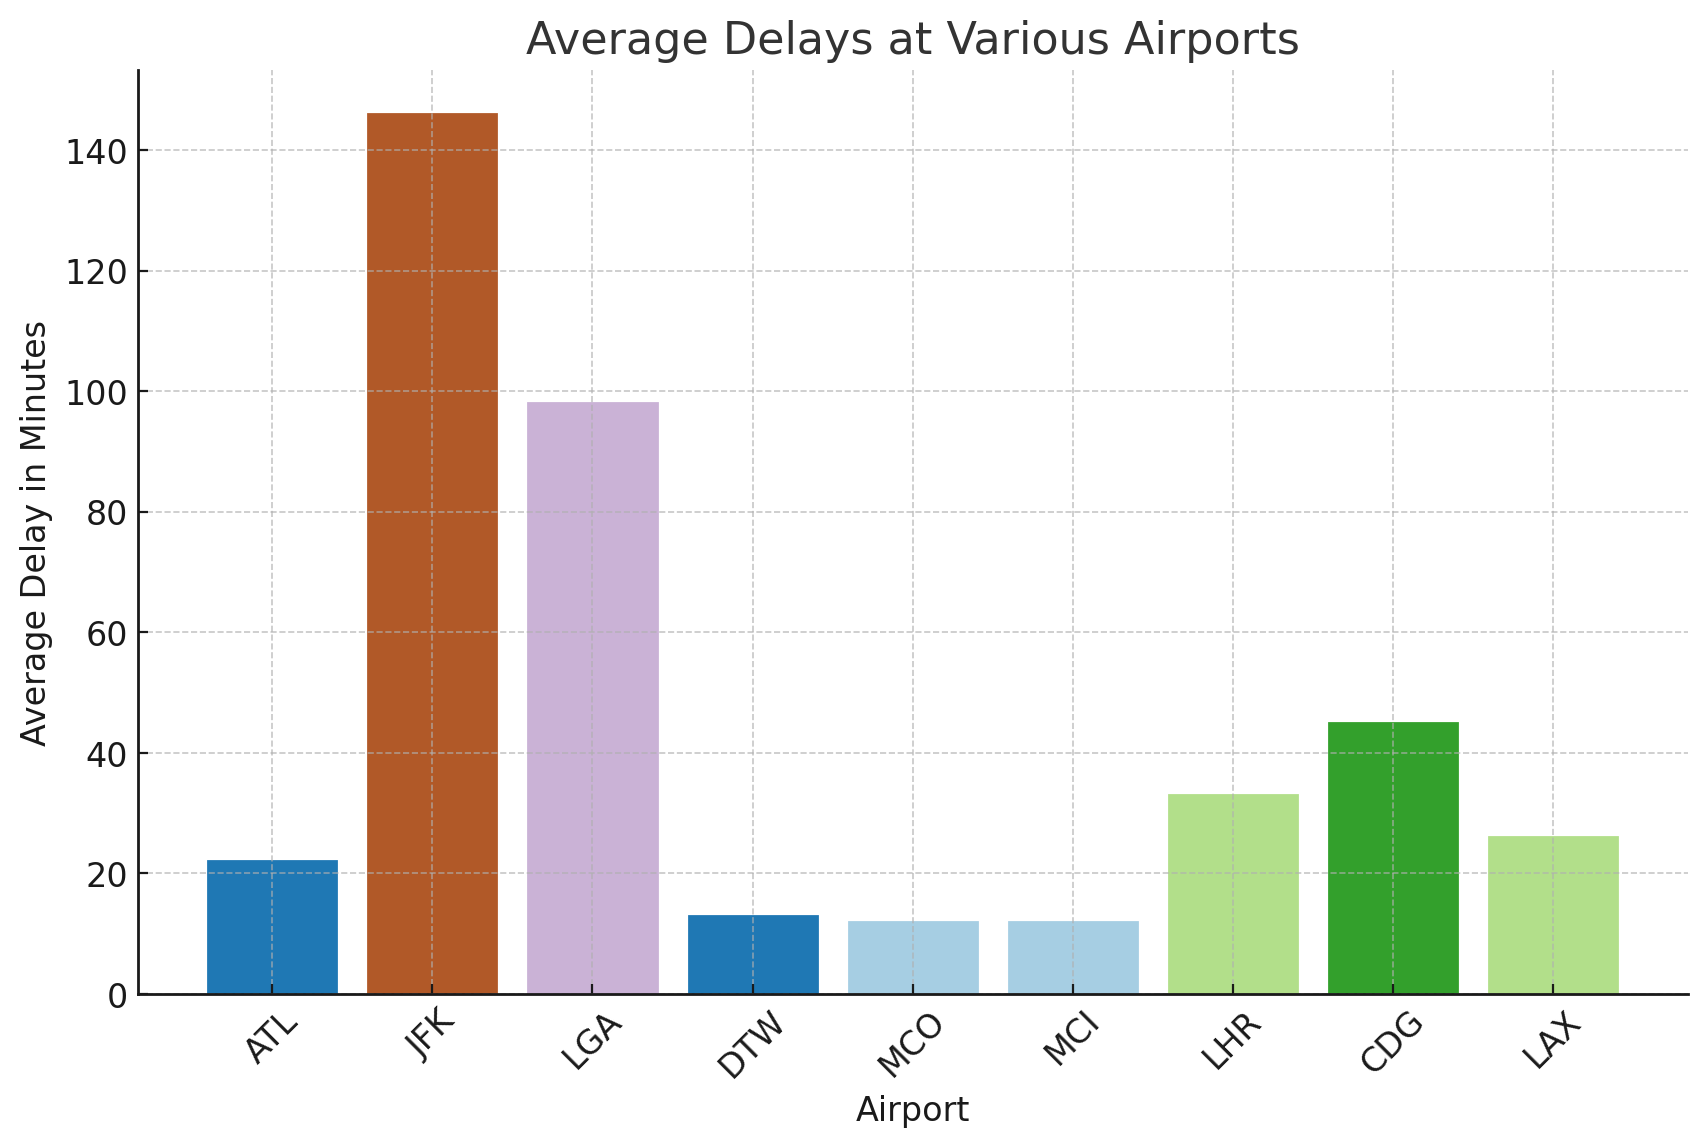

Here's the colorful histogram depicting the average delays at various airports. Each bar represents an airport, colored according to its delay duration. The colors are chosen to ensure clear differentiation, with each bar's height proportional to the average delay in minutes.

If you have any further requirements or need modifications, feel free to let me know!

In [25]:
prompt = '''
    Generate a colorful histogram showing delays at various airports using the following CSV-formatted data:
    
    Airport,Average Delay in Minutes
    ATL,22
    JFK,146
    LGA,98
    DTW,13
    MCO,12
    MCI,12
    LHR,33
    CDG,45
    LAX,26    
    '''

thread = client.beta.threads.create()

message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role='user',
    content=prompt
)

with client.beta.threads.runs.stream(
    thread_id=thread.id,
    assistant_id=assistant.id,
    event_handler=EventHandler()
) as stream:
    stream.until_done()

You can even ask the assistant to modify the charts that it generates.

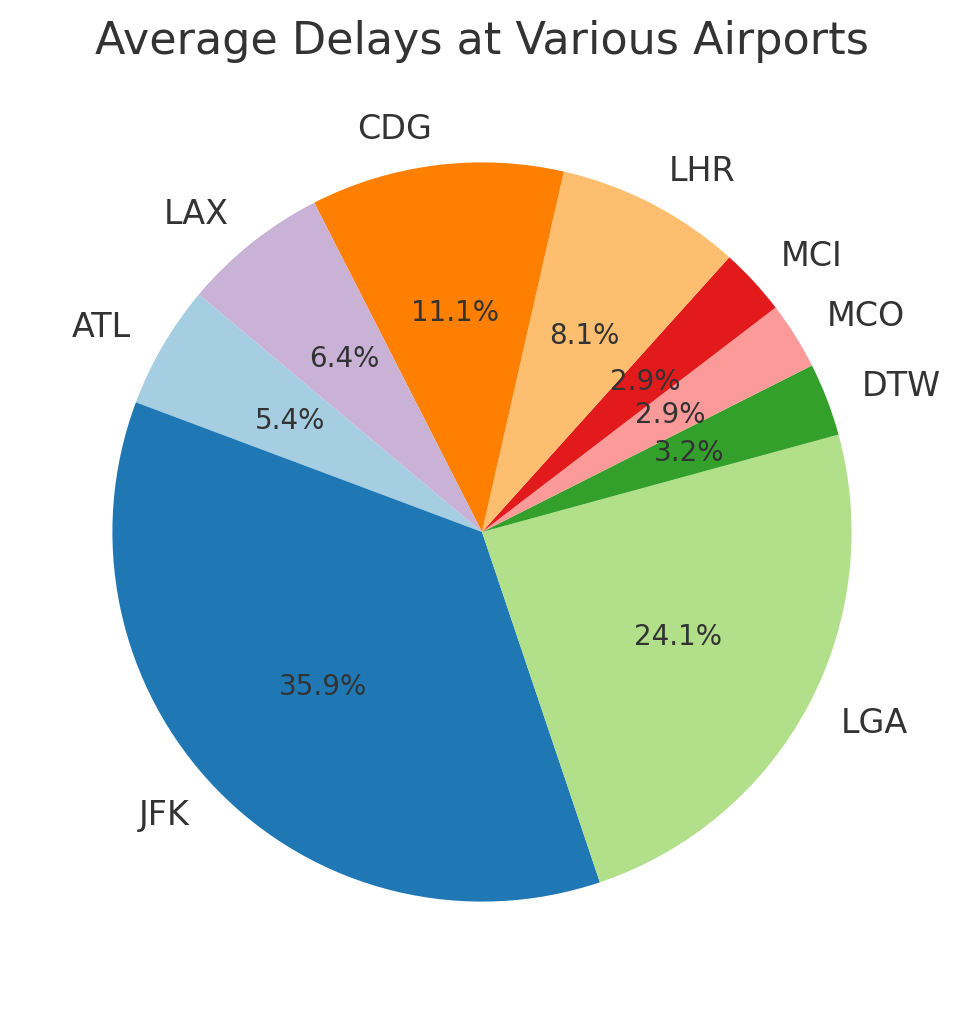

Here's the pie chart representing the average delays at various airports. Each slice corresponds to an airport, with the size proportional to the average delay in minutes. The percentage values indicate the relative contribution of each airport's delay to the total.

If there are any specific adjustments or additional details you need, please let me know!

In [26]:
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role='user',
    content='Make it a pie chart'
)

with client.beta.threads.runs.stream(
    thread_id=thread.id,
    assistant_id=assistant.id,
    event_handler=EventHandler()
) as stream:
    stream.until_done()

Clean up by deleting the assistant and the image files it created.

In [27]:
for file_id in file_ids:
    client.files.delete(file_id)
    
client.beta.assistants.delete(assistant.id)

AssistantDeleted(id='asst_JAywtr4UclvsAp4D8Q7A6fJi', deleted=True, object='assistant.deleted')